# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


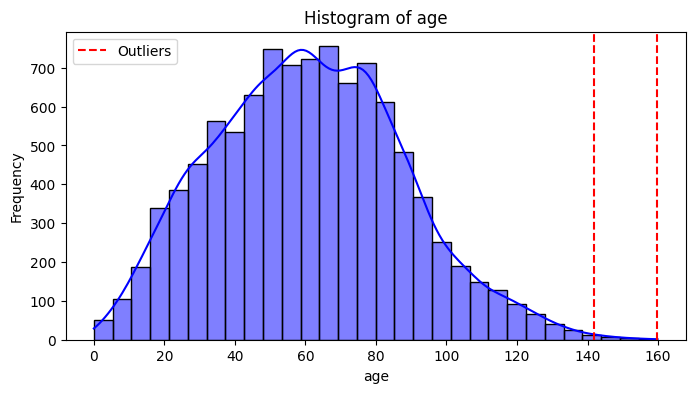

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1541
           1       0.87      0.79      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.567222, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3548, 3440]\nclass = 0')


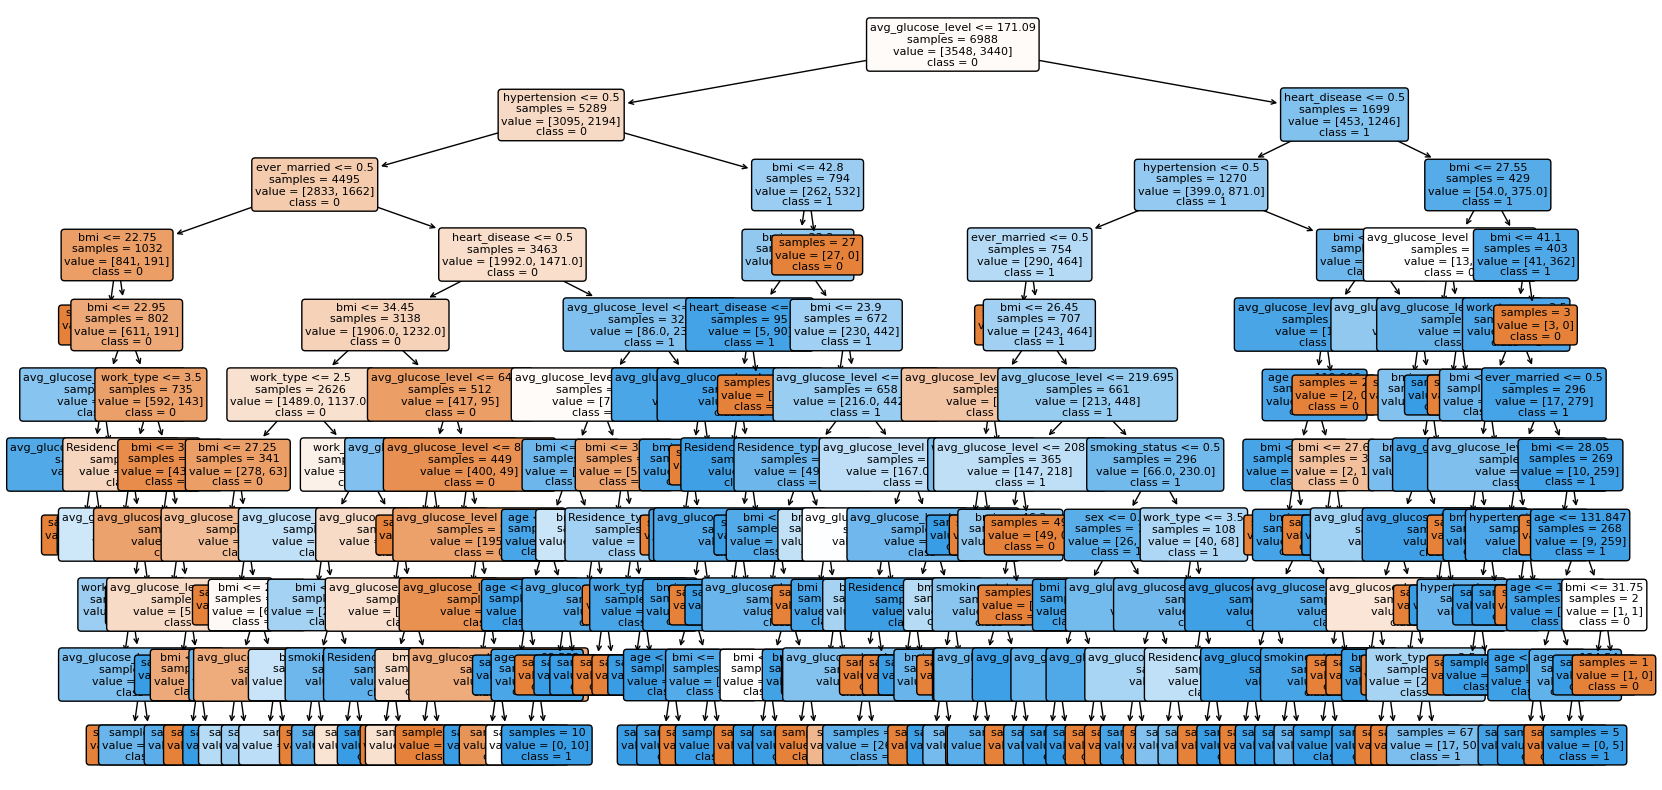

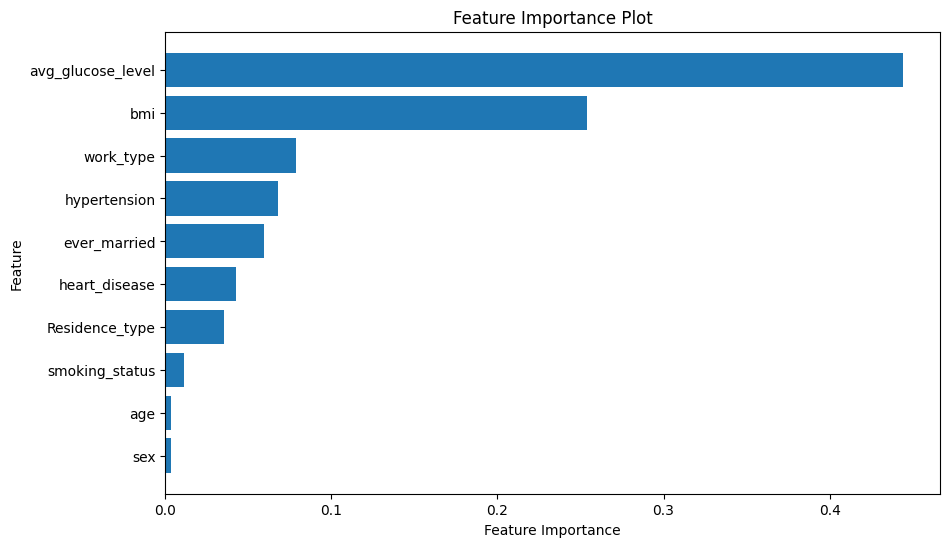

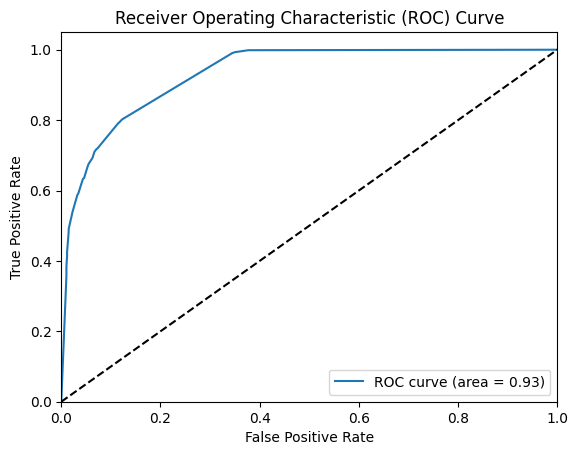

AUC Score: 0.9316929471869697
Accuracy for each fold: [0.7433333333333333, 0.7933333333333333, 0.8366666666666667, 0.8, 0.7466666666666667, 0.83, 0.822742474916388, 0.8260869565217391, 0.8327759197324415, 0.7525083612040134]
Mean accuracy: 0.7984113712374581
95% confidence interval: (0.7713844325072386, 0.8254383099676775)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


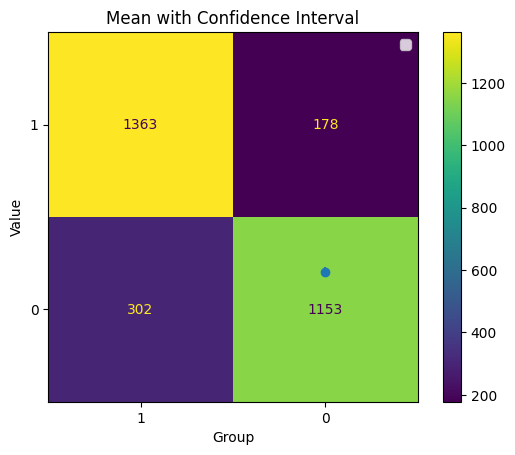

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



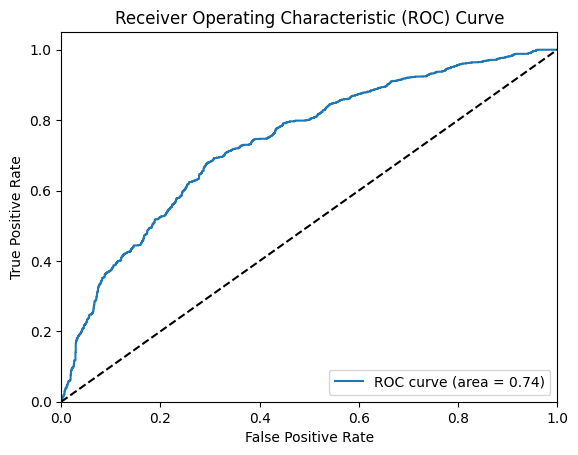

AUC Score: 0.7394354984378868


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.63, 0.6366666666666667, 0.6566666666666666, 0.69, 0.7066666666666667, 0.6466666666666666, 0.6755852842809364, 0.6755852842809364, 0.6789297658862876, 0.6454849498327759]
Mean accuracy: 0.6642251950947603
95% confidence interval: (0.6464011235512489, 0.6820492666382717)


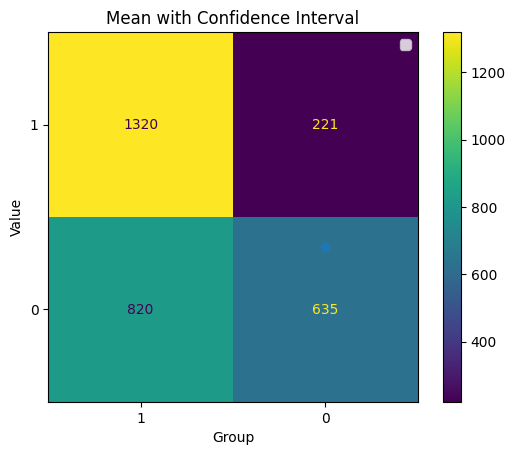

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


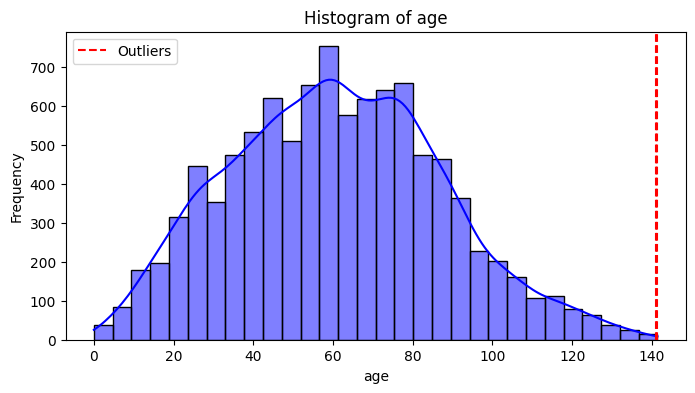

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1541
           1       0.87      0.79      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.570478, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3548, 3440]\nclass = 0')


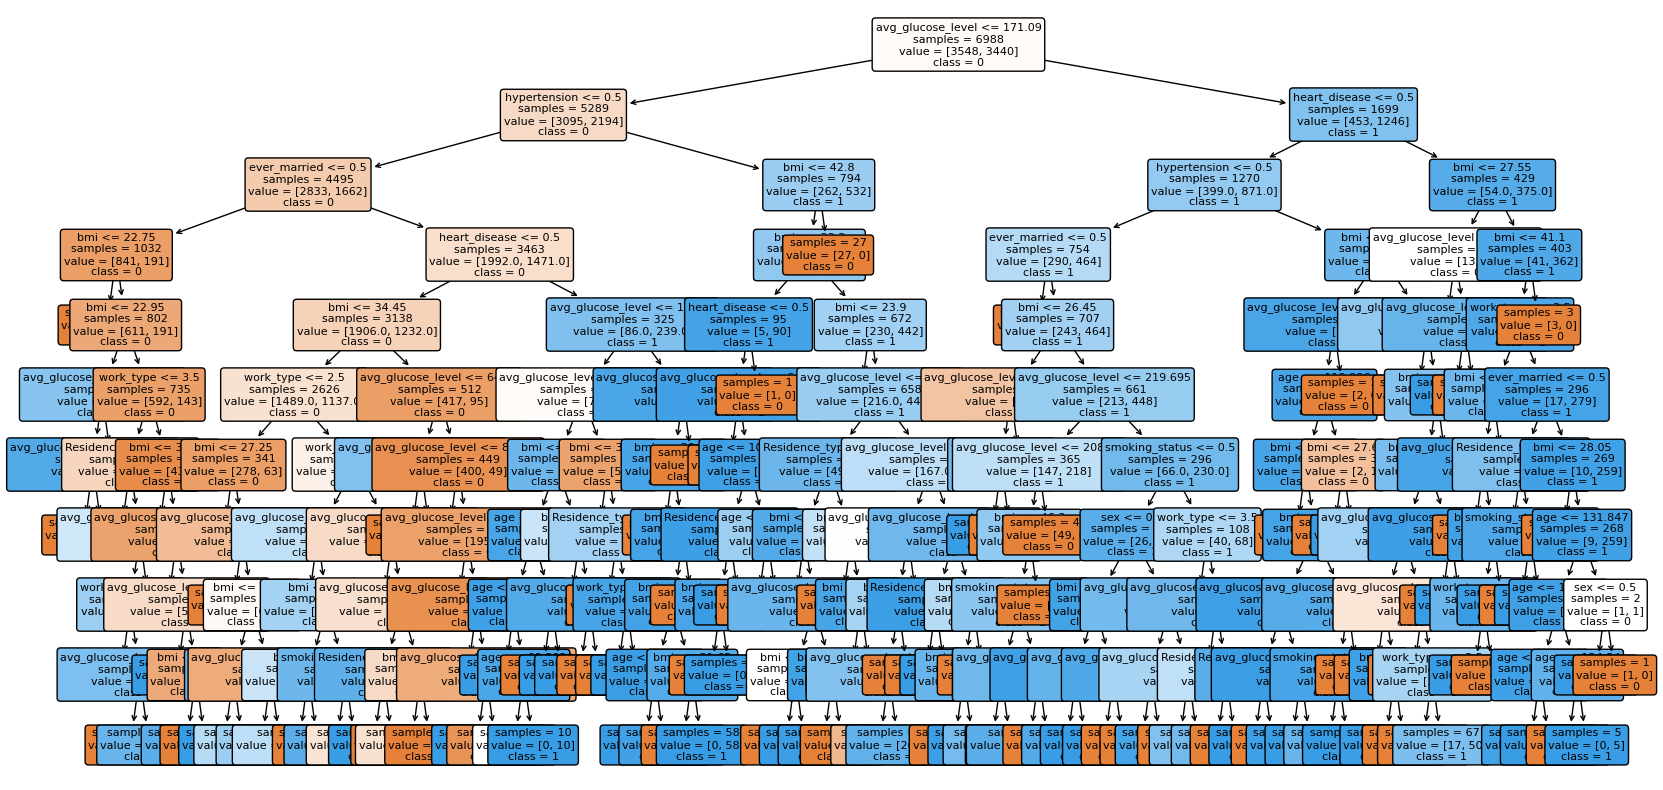

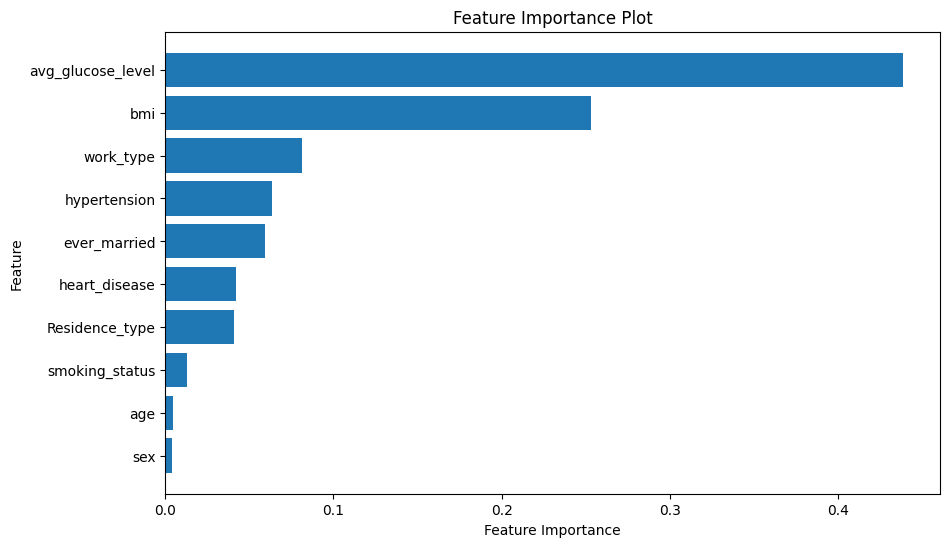

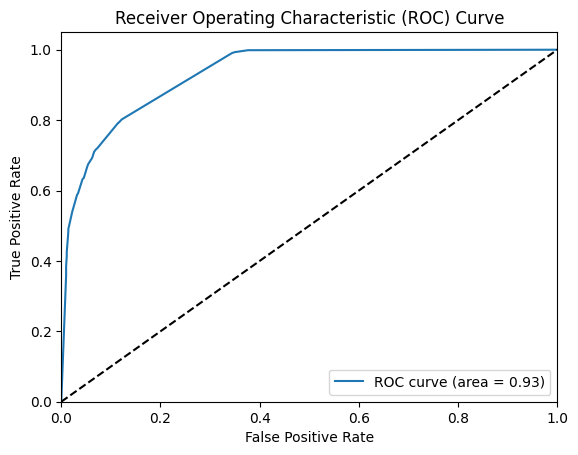

AUC Score: 0.9322252475854702


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8066666666666666, 0.8, 0.81, 0.8066666666666666, 0.8733333333333333, 0.8466666666666667, 0.7993311036789298, 0.8193979933110368, 0.8528428093645485, 0.7792642140468228]
Mean accuracy: 0.8194169453734672
95% confidence interval: (0.7986656597809014, 0.840168230966033)


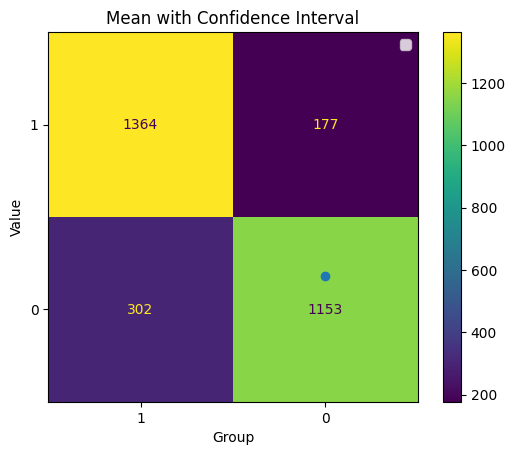

In [10]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



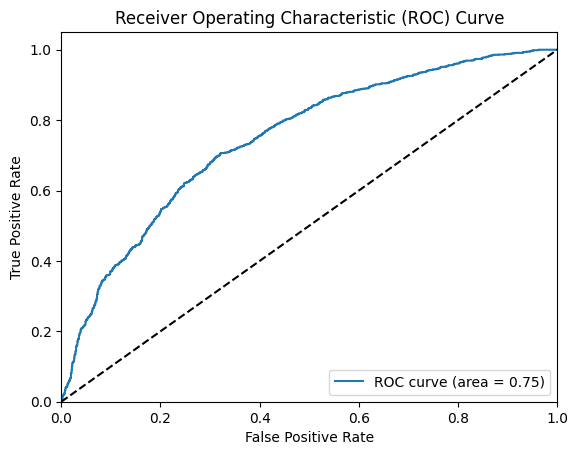

AUC Score: 0.7472369216222786


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6566666666666666, 0.67, 0.6266666666666667, 0.7233333333333334, 0.6233333333333333, 0.6833333333333333, 0.6588628762541806, 0.6588628762541806, 0.6889632107023411, 0.6454849498327759]
Mean accuracy: 0.6635507246376812
95% confidence interval: (0.6421586343353008, 0.6849428149400615)


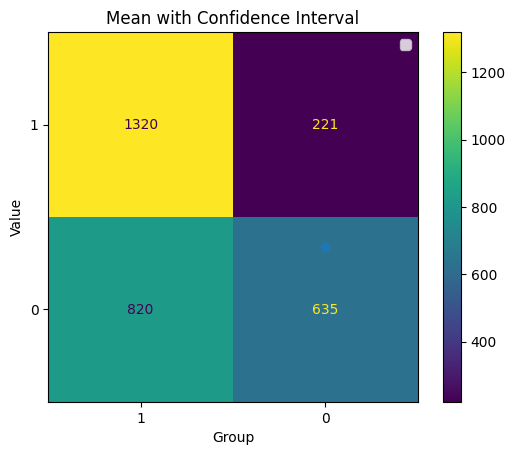

--------------------------------------


In [11]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


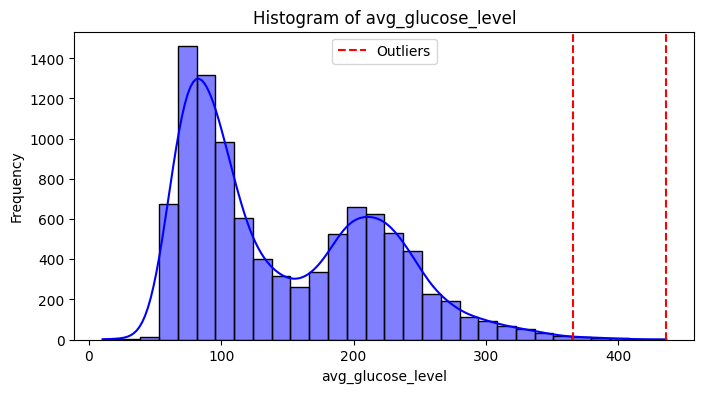

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1541
           1       0.80      0.79      0.79      1455

    accuracy                           0.80      2996
   macro avg       0.80      0.80      0.80      2996
weighted avg       0.80      0.80      0.80      2996

Node Labels:
 Annotation(0.64941, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3457, 3531]\nclass = 1')


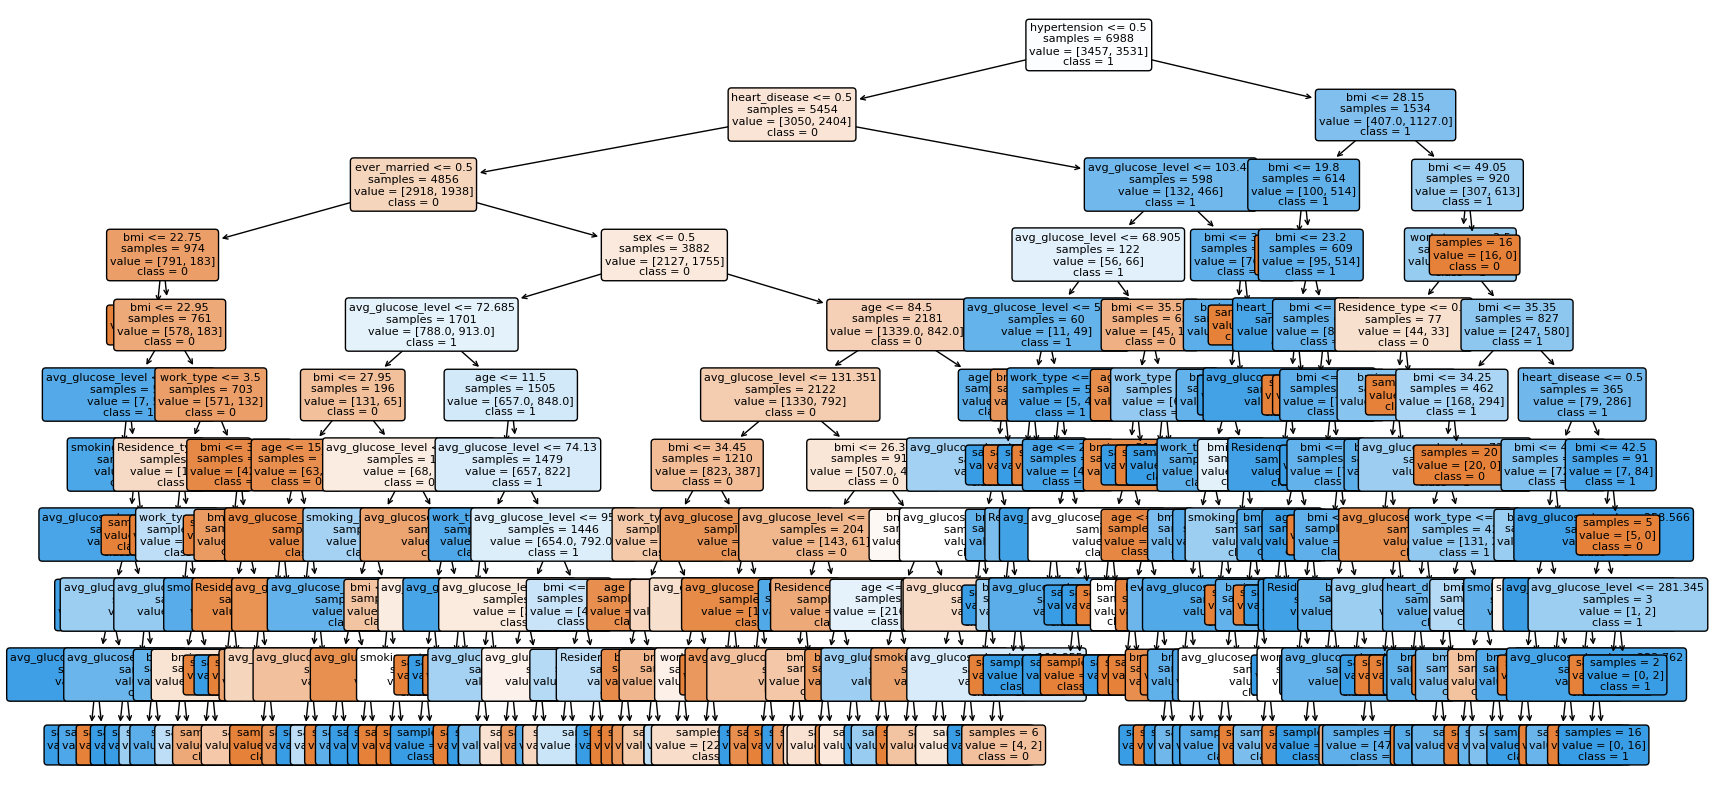

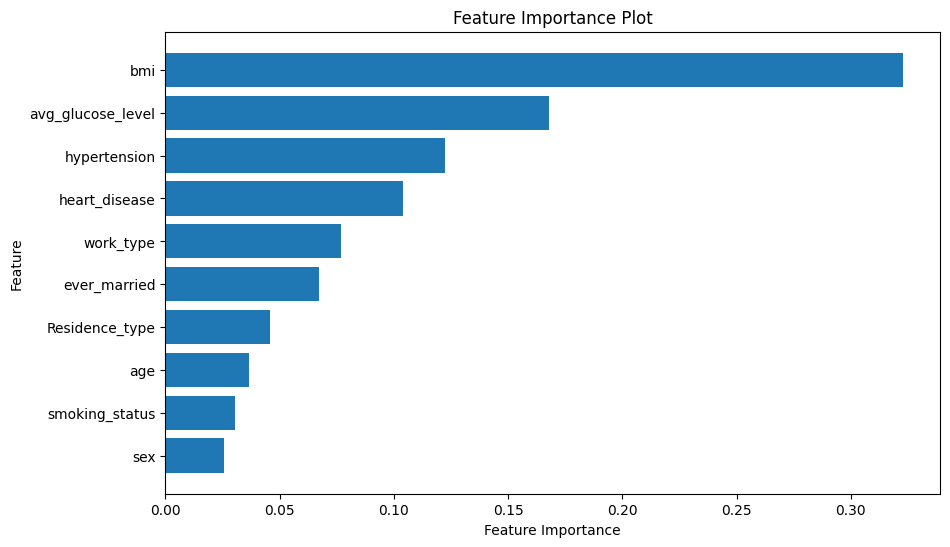

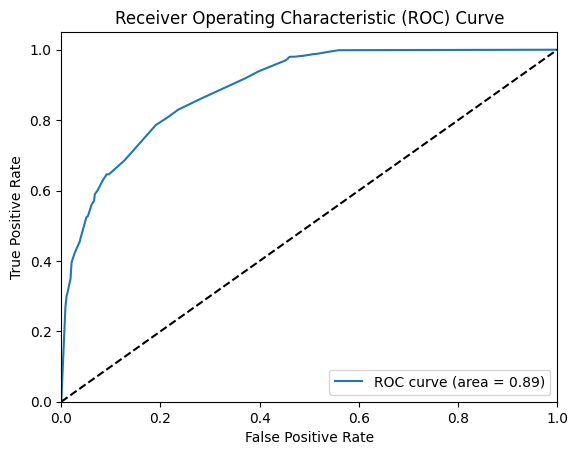

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8908128563814723
Accuracy for each fold: [0.7766666666666666, 0.7833333333333333, 0.84, 0.8166666666666667, 0.7666666666666667, 0.8033333333333333, 0.8461538461538461, 0.8327759197324415, 0.8127090301003345, 0.8260869565217391]
Mean accuracy: 0.8104392419175028
95% confidence interval: (0.7908064461902168, 0.8300720376447889)


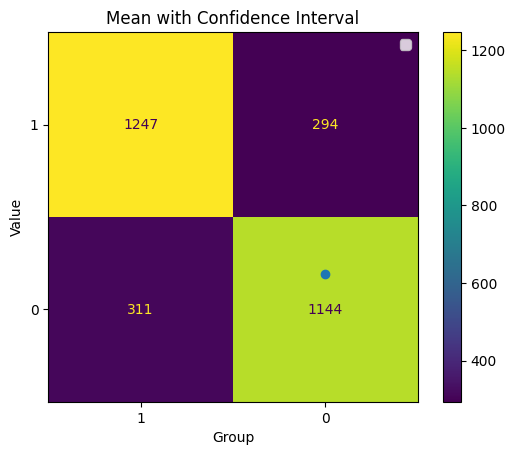

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



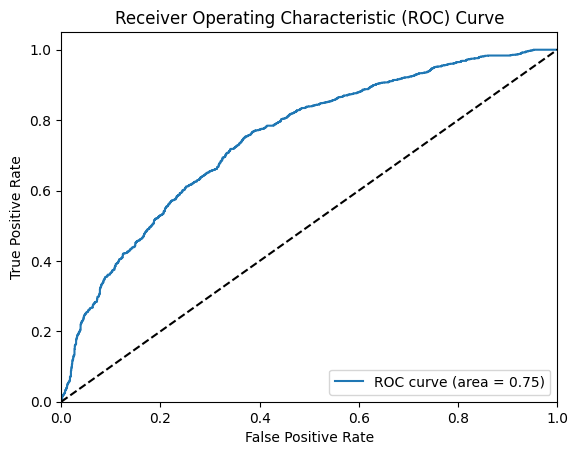

AUC Score: 0.7475179013047715


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.66, 0.6966666666666667, 0.7066666666666667, 0.65, 0.5833333333333334, 0.7, 0.6722408026755853, 0.6755852842809364, 0.6187290969899666, 0.7123745819397993]
Mean accuracy: 0.6675596432552953
95% confidence interval: (0.6379995965282087, 0.6971196899823818)


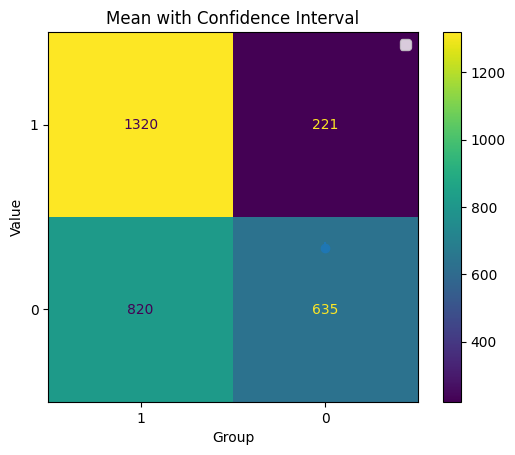

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


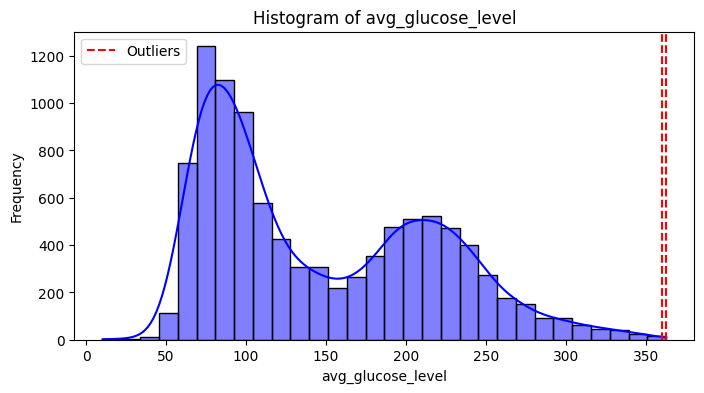

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1541
           1       0.80      0.79      0.79      1455

    accuracy                           0.80      2996
   macro avg       0.80      0.80      0.80      2996
weighted avg       0.80      0.80      0.80      2996

Node Labels:
 Annotation(0.64941, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3457, 3531]\nclass = 1')


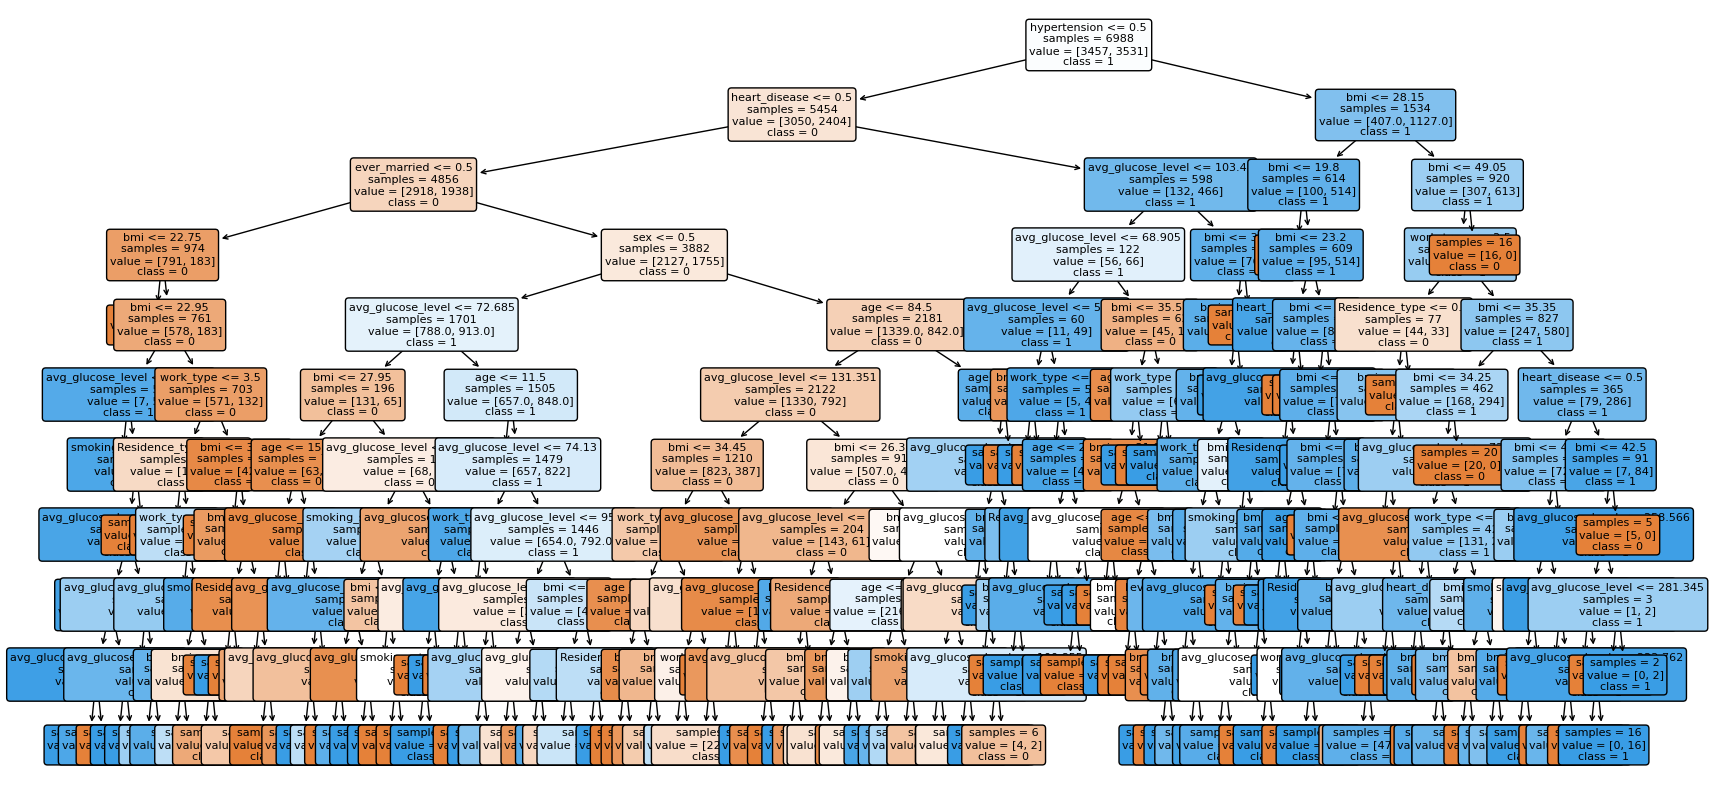

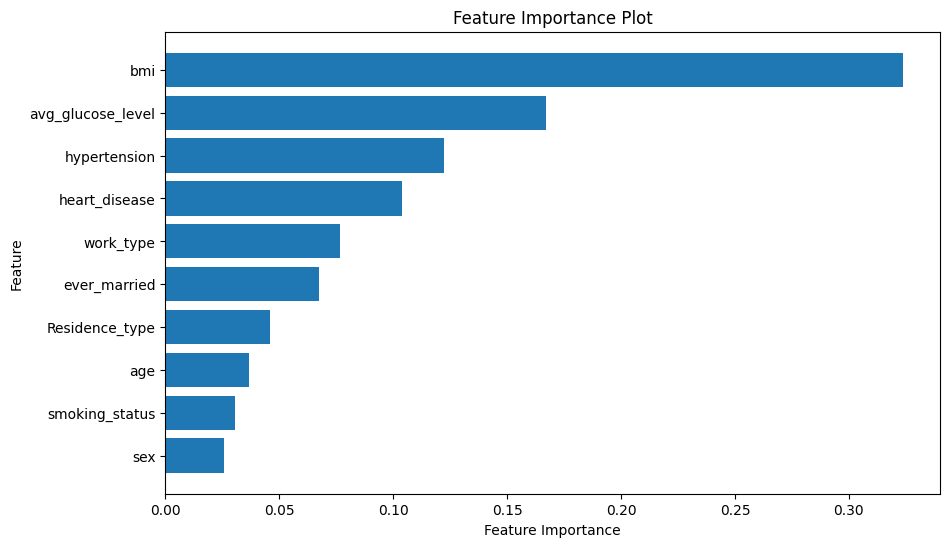

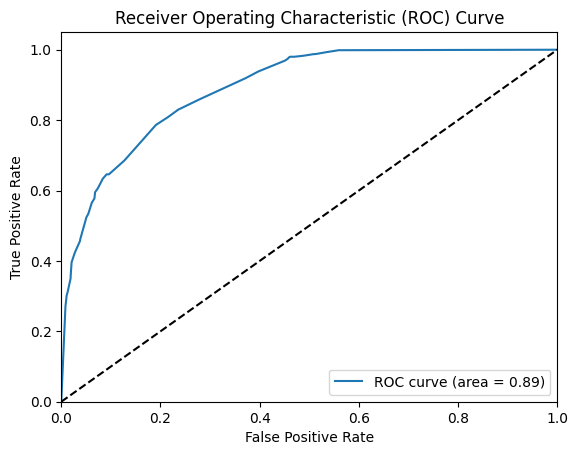

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8909575832179311
Accuracy for each fold: [0.8233333333333334, 0.8266666666666667, 0.8033333333333333, 0.7933333333333333, 0.7933333333333333, 0.8666666666666667, 0.8695652173913043, 0.8160535117056856, 0.7759197324414716, 0.802675585284281]
Mean accuracy: 0.817088071348941
95% confidence interval: (0.7950212066127302, 0.8391549360851518)


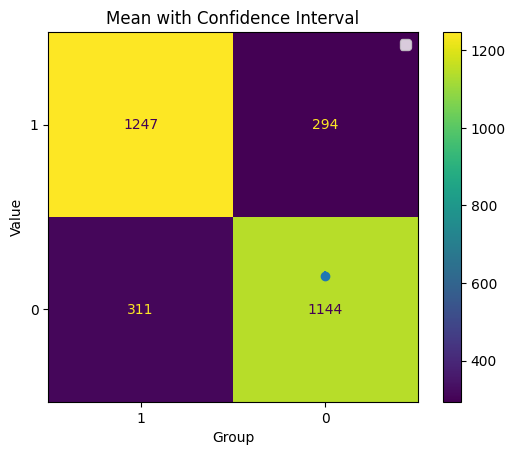

In [20]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



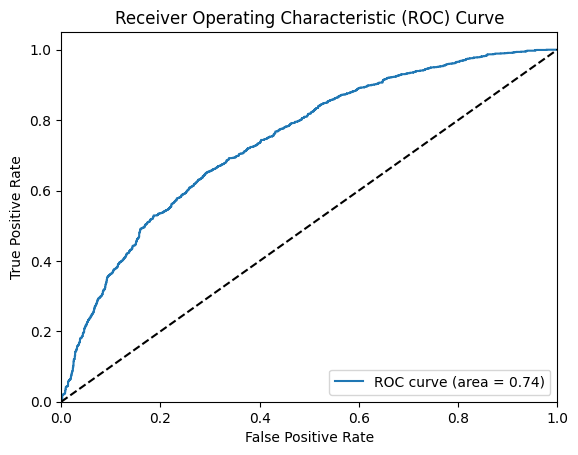

AUC Score: 0.7420044555349652


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6333333333333333, 0.6633333333333333, 0.6866666666666666, 0.6533333333333333, 0.6666666666666666, 0.6666666666666666, 0.6822742474916388, 0.6421404682274248, 0.6488294314381271, 0.725752508361204]
Mean accuracy: 0.6668996655518394
95% confidence interval: (0.6478923219645557, 0.6859070091391232)


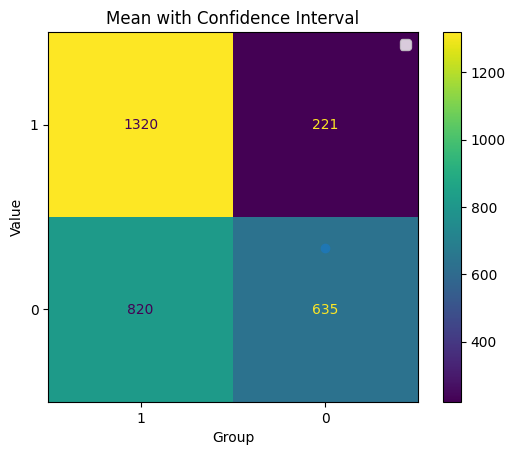

--------------------------------------


In [21]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


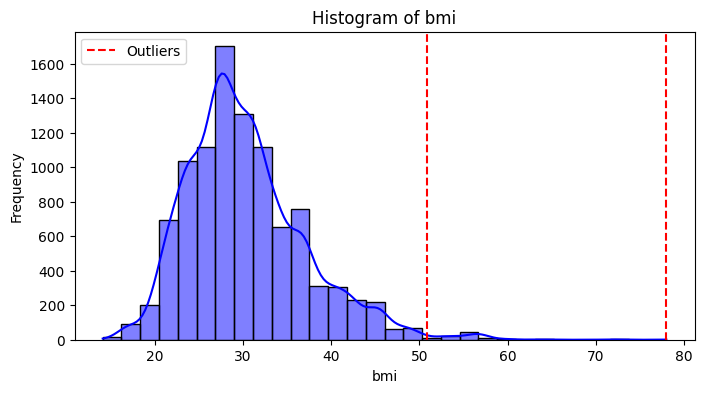

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


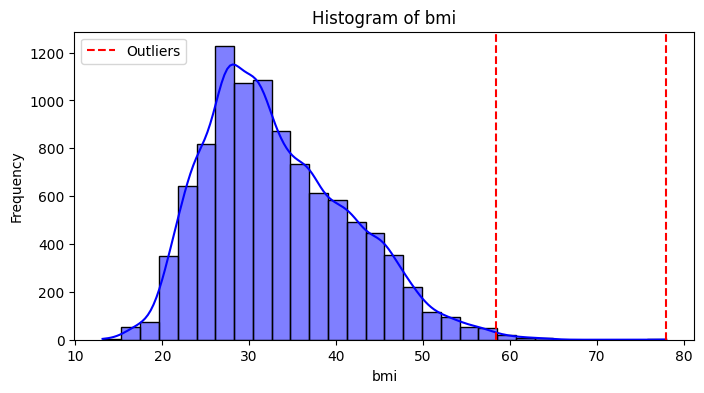

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1541
           1       0.83      0.83      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996



Node Labels:
 Annotation(0.573462, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3471, 3517]\nclass = 1')


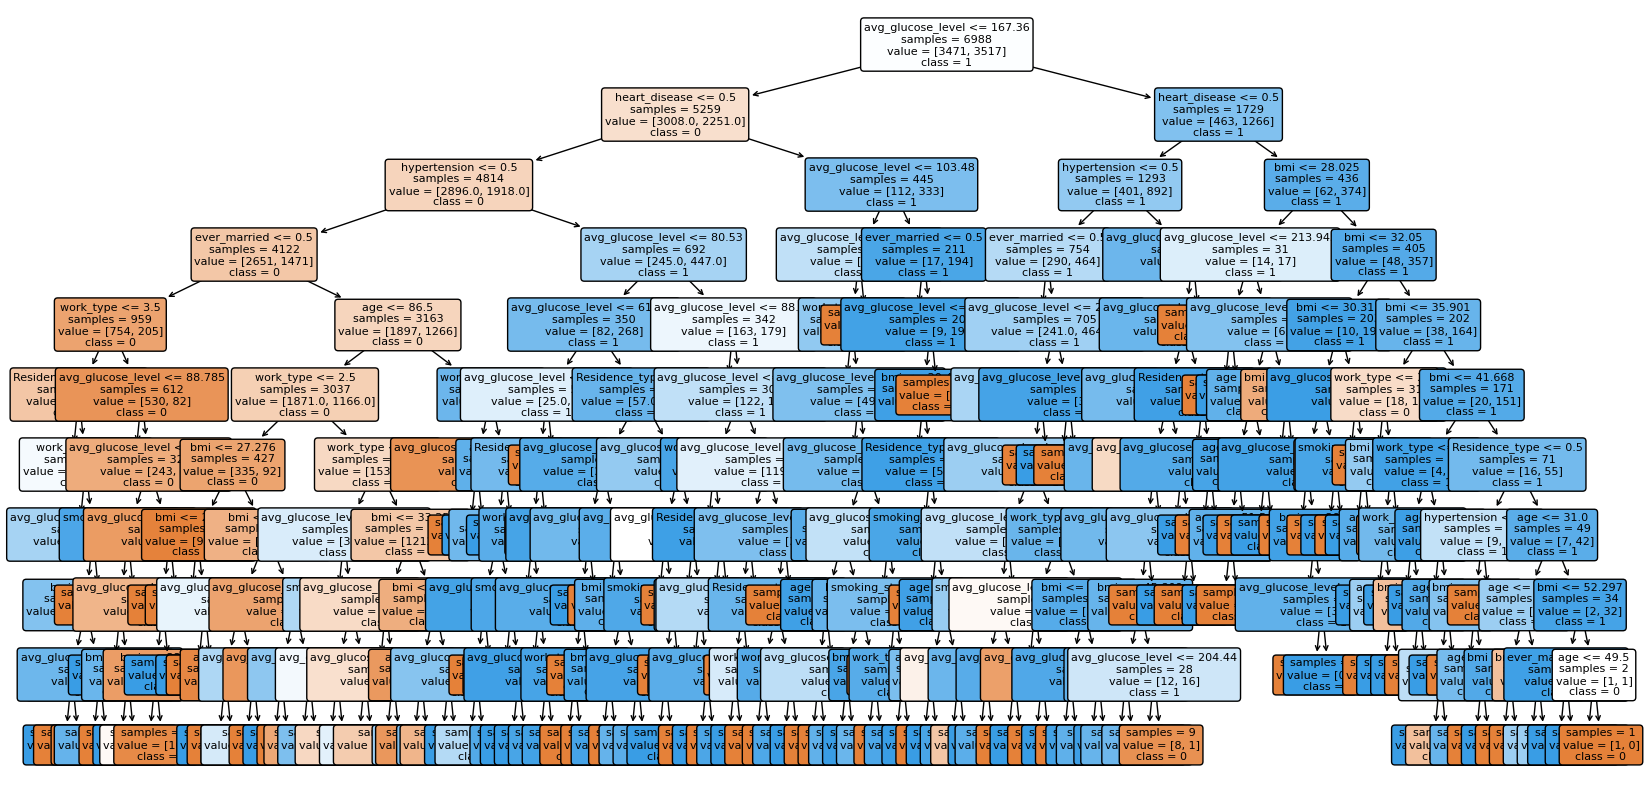

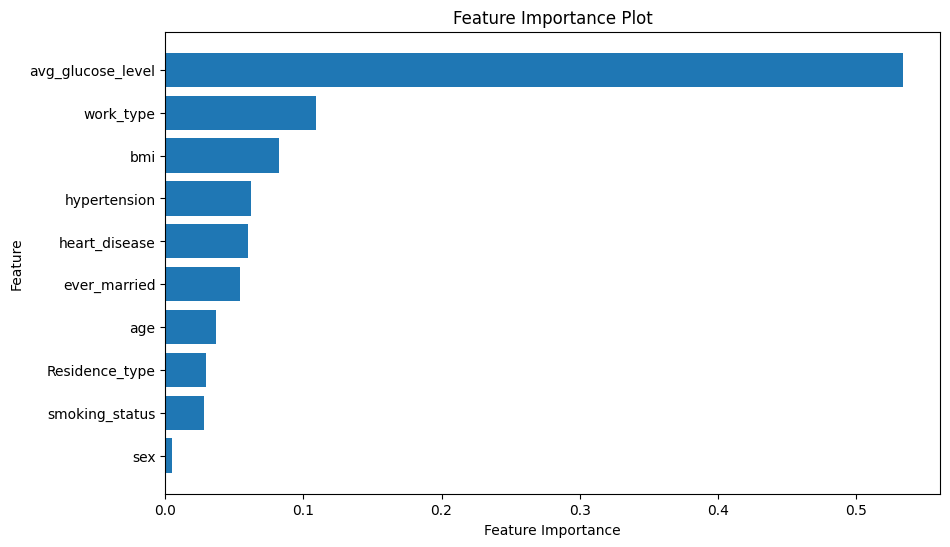

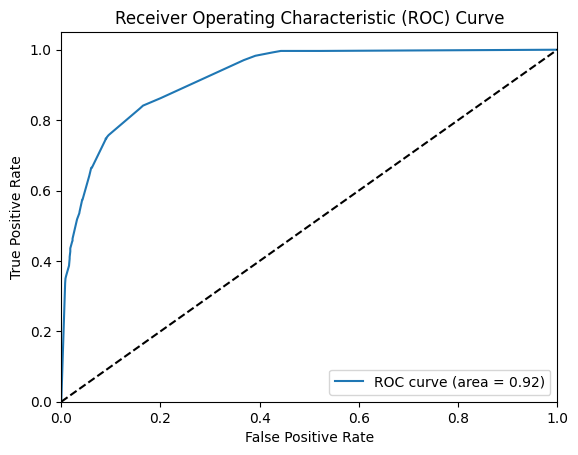

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9227056113426593
Accuracy for each fold: [0.7933333333333333, 0.7966666666666666, 0.86, 0.77, 0.7833333333333333, 0.8366666666666667, 0.7892976588628763, 0.8260869565217391, 0.8528428093645485, 0.7959866220735786]
Mean accuracy: 0.8104214046822742
95% confidence interval: (0.7881861141208074, 0.832656695243741)


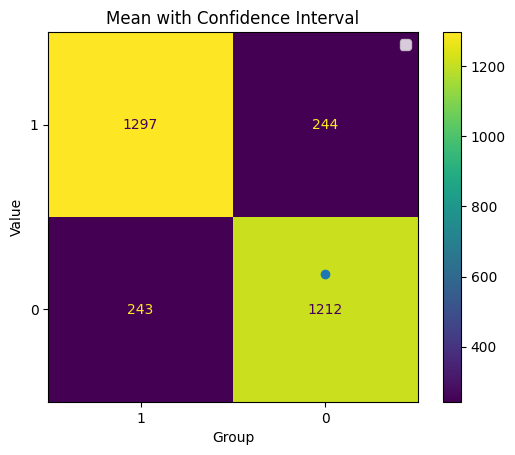

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector MAchine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1541
           1       0.72      0.54      0.62      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.67      0.67      2996



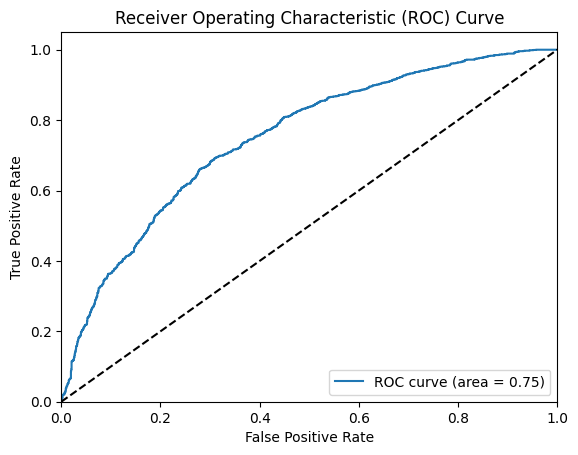

AUC Score: 0.748268072457078


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6466666666666666, 0.6166666666666667, 0.66, 0.6766666666666666, 0.73, 0.6833333333333333, 0.6387959866220736, 0.705685618729097, 0.6488294314381271, 0.6488294314381271]
Mean accuracy: 0.6655473801560758
95% confidence interval: (0.6413983975339745, 0.6896963627781771)


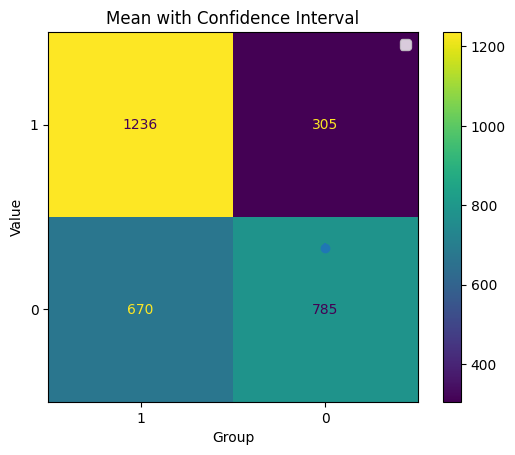

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


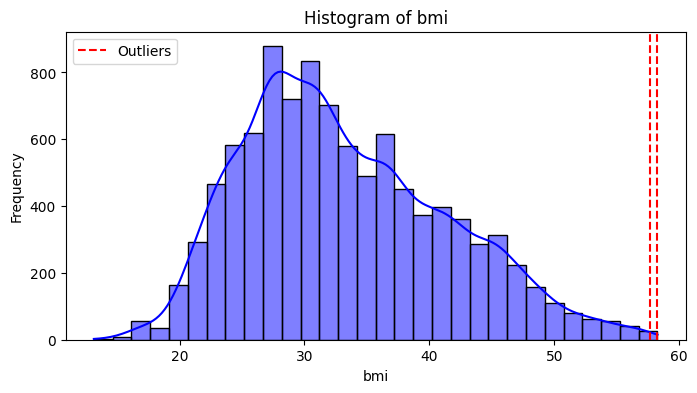

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1541
           1       0.83      0.83      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.585245, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3471, 3517]\nclass = 1')


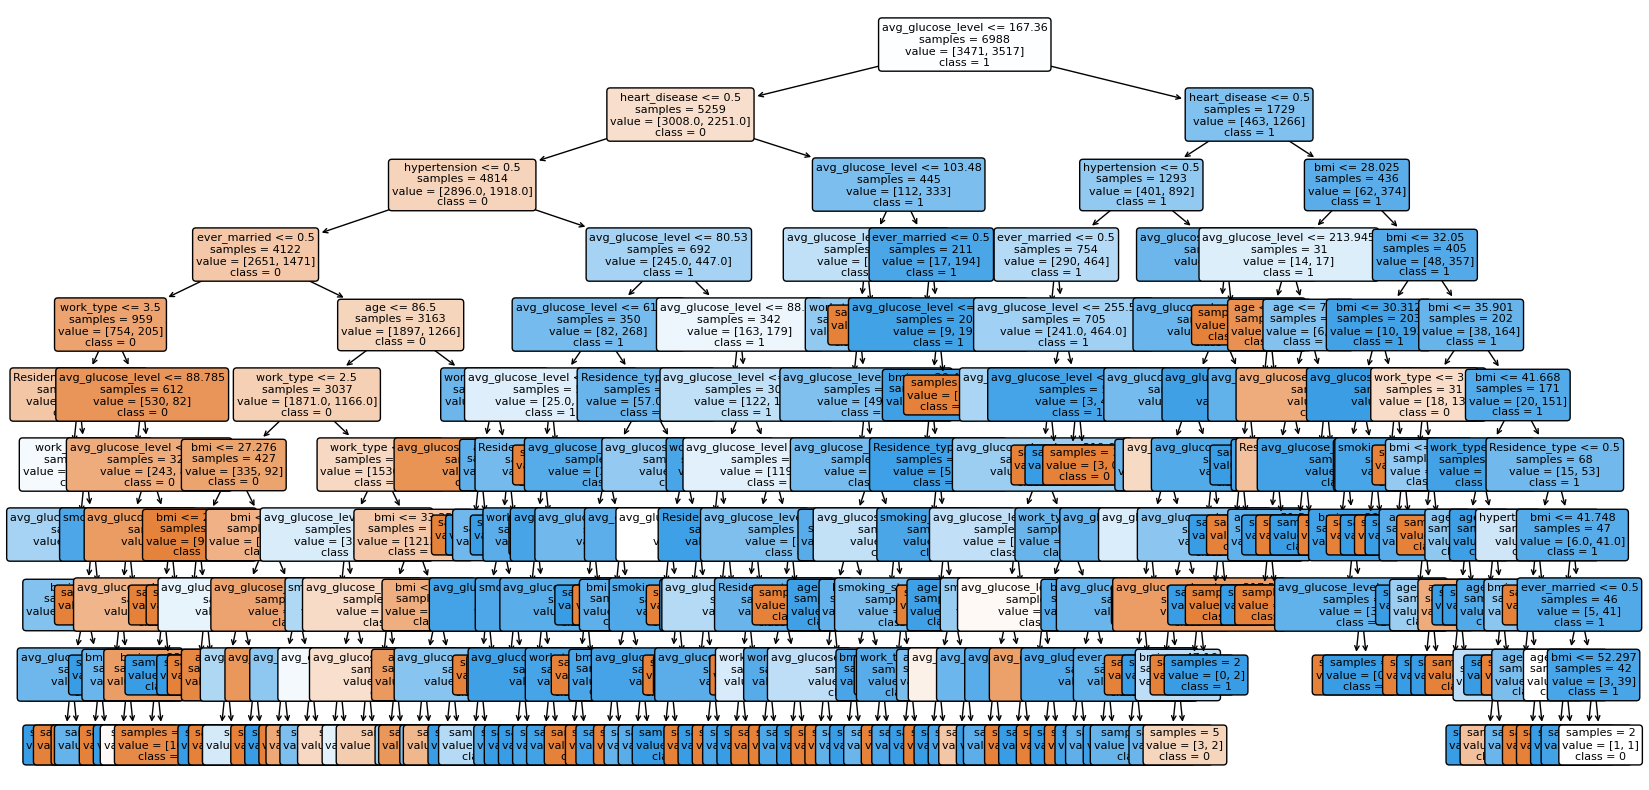

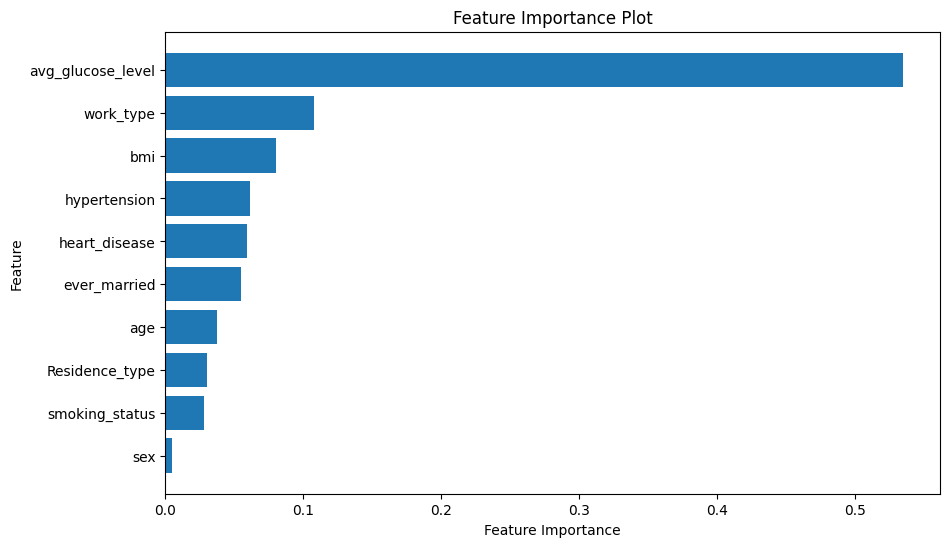

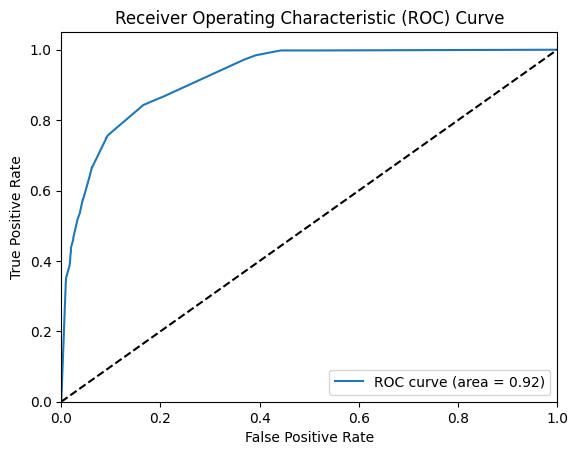

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.922961392053627
Accuracy for each fold: [0.8, 0.7966666666666666, 0.8, 0.8533333333333334, 0.7866666666666666, 0.8033333333333333, 0.8093645484949833, 0.7525083612040134, 0.842809364548495, 0.7959866220735786]
Mean accuracy: 0.804066889632107
95% confidence interval: (0.7840156909811422, 0.8241180882830719)


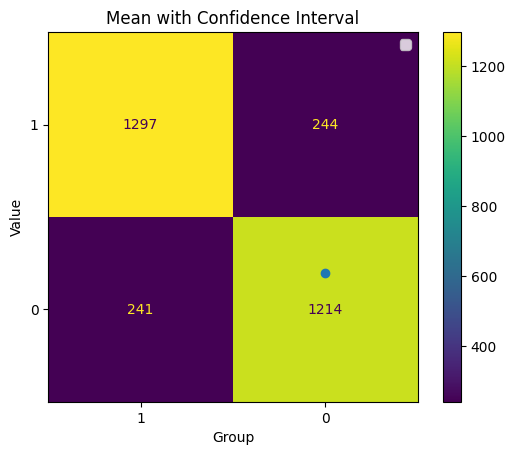

In [30]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1541
           1       0.72      0.54      0.62      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.67      0.67      2996



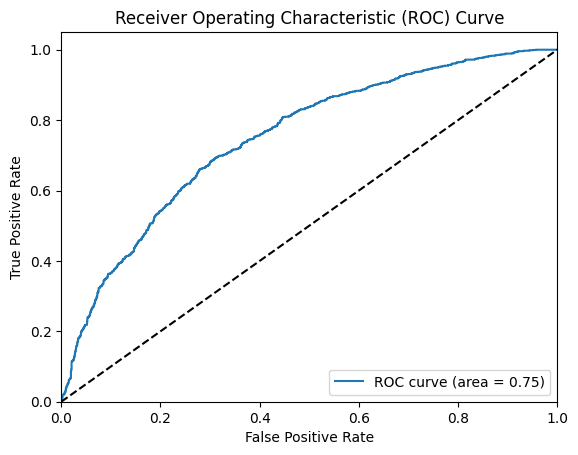

AUC Score: 0.7483532583608181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.66, 0.67, 0.6866666666666666, 0.6466666666666666, 0.6866666666666666, 0.68, 0.6655518394648829, 0.68561872909699, 0.6454849498327759, 0.6421404682274248]
Mean accuracy: 0.6668795986622073
95% confidence interval: (0.654164247362463, 0.6795949499619515)


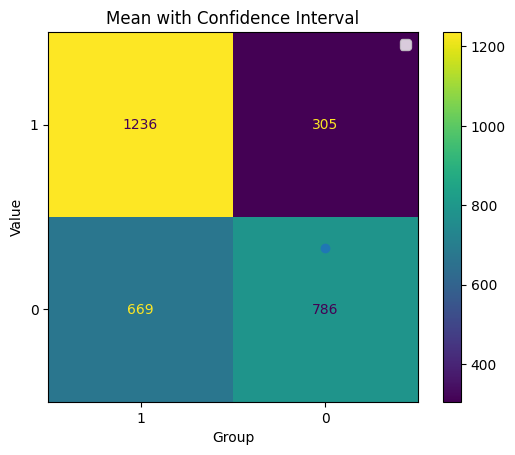

--------------------------------------


In [31]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


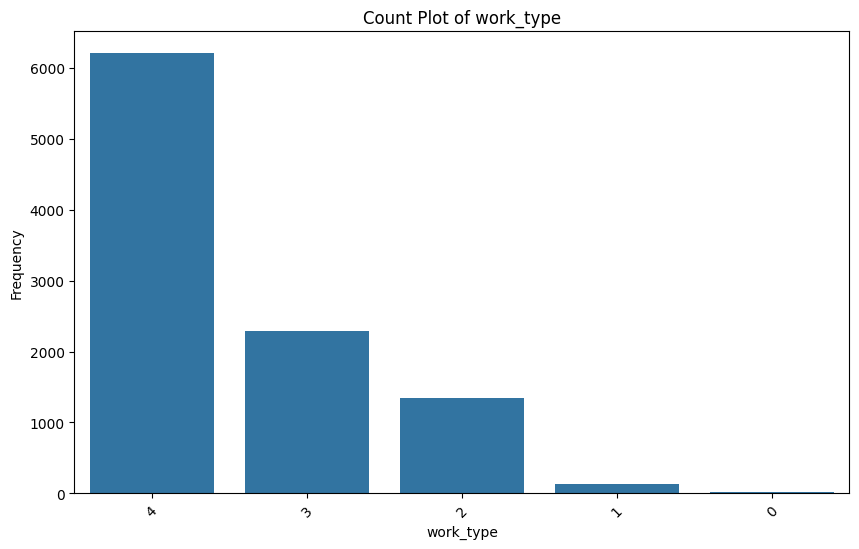

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Valore meno frequente:  0


Value counts:
work_type
4    4333
0    3013
3    1602
2     941
1      95
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


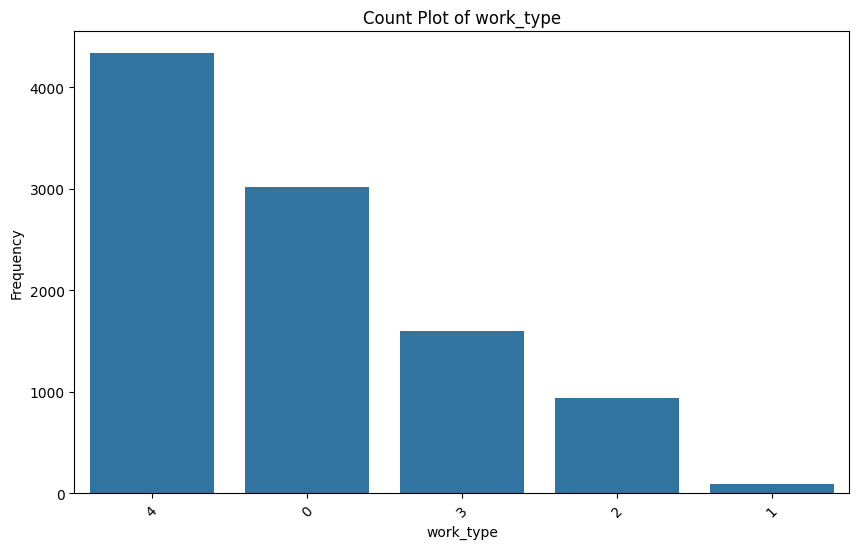

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1541
           1       0.79      0.90      0.84      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996



Node Labels:
 Annotation(0.619286, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


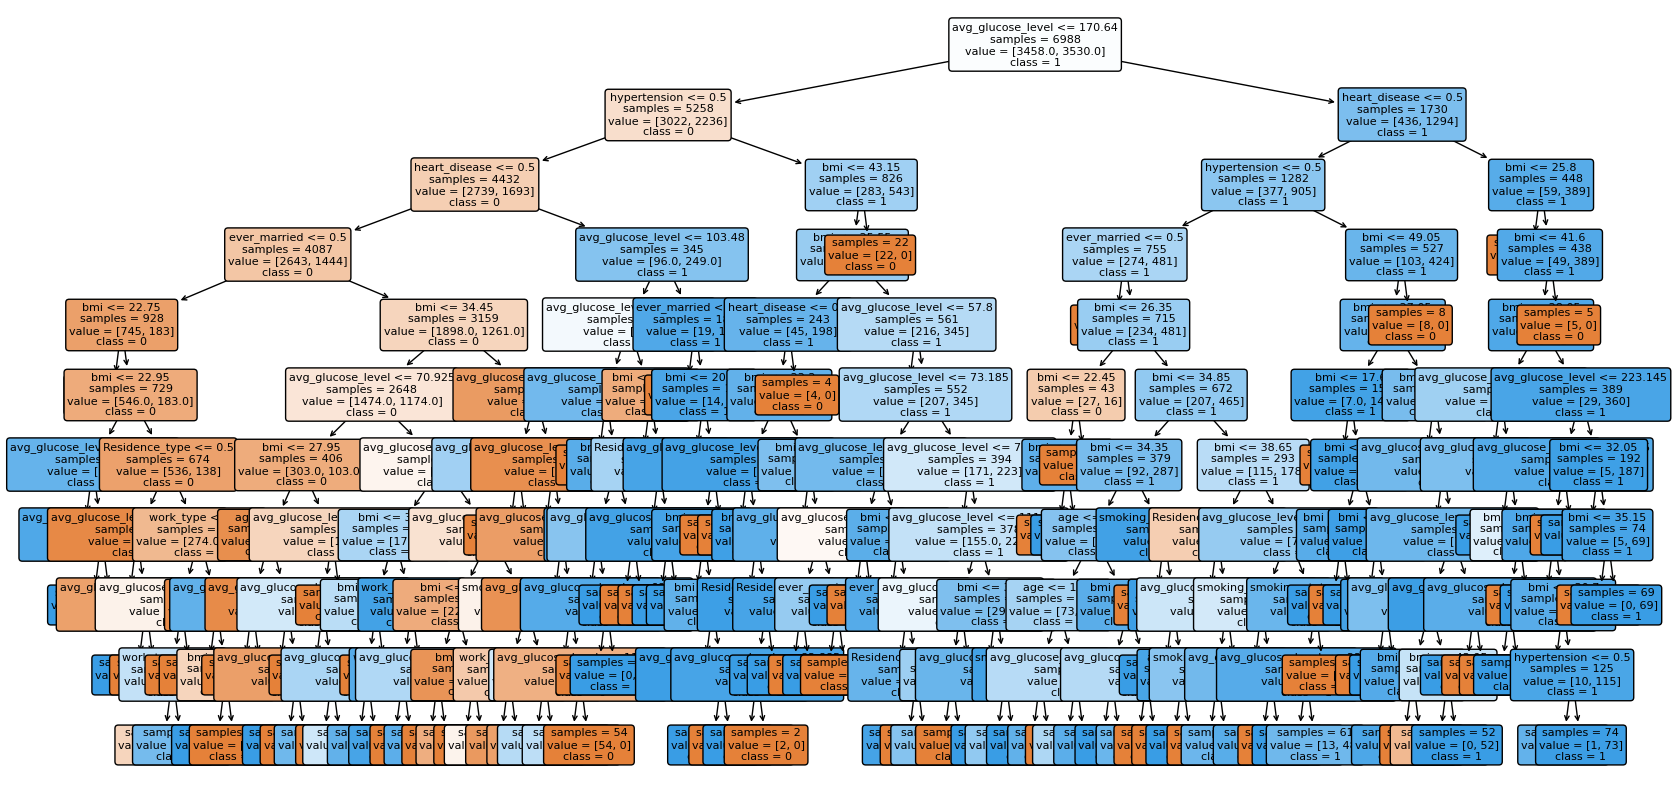

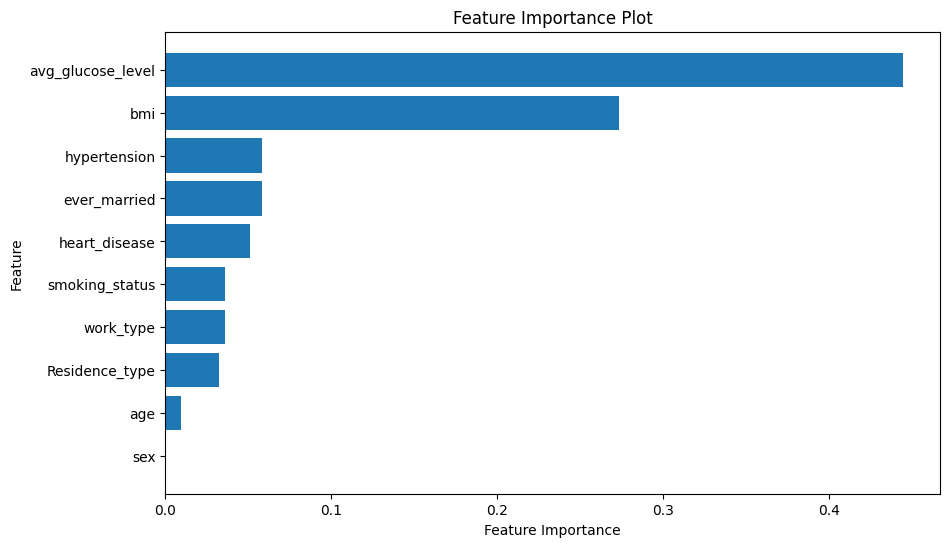

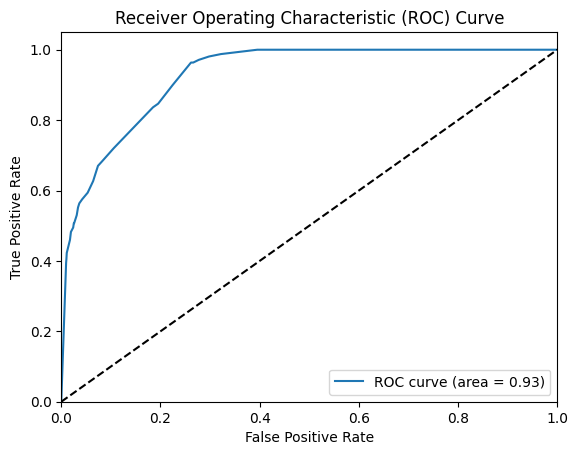

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9268335596780776
Accuracy for each fold: [0.8166666666666667, 0.8133333333333334, 0.82, 0.8233333333333334, 0.76, 0.7833333333333333, 0.7859531772575251, 0.802675585284281, 0.8361204013377926, 0.8127090301003345]
Mean accuracy: 0.8054124860646599
95% confidence interval: (0.7891425890558686, 0.8216823830734511)


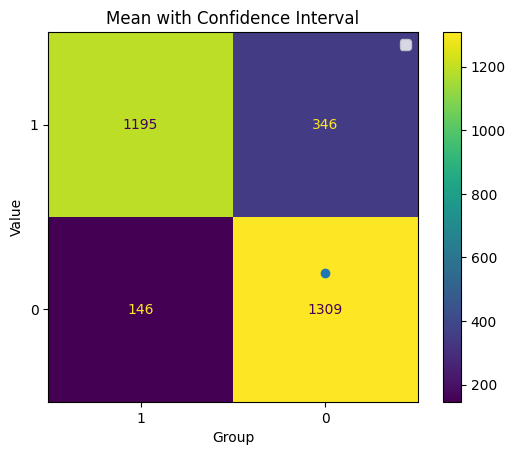

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1541
           1       0.72      0.57      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



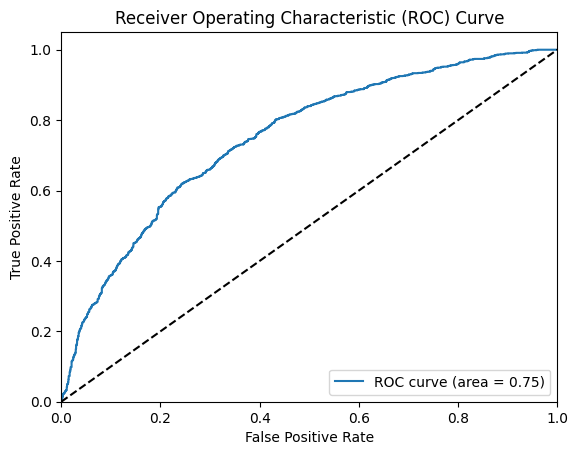

AUC Score: 0.7493656772167847


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.6966666666666667, 0.6566666666666666, 0.6433333333333333, 0.6733333333333333, 0.7033333333333334, 0.7357859531772575, 0.6454849498327759, 0.5919732441471572, 0.6555183946488294]
Mean accuracy: 0.6675429208472687
95% confidence interval: (0.639430181409941, 0.6956556602845965)


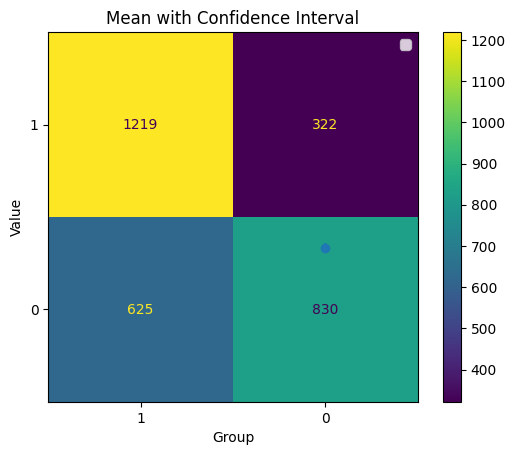

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve - Decision Tree

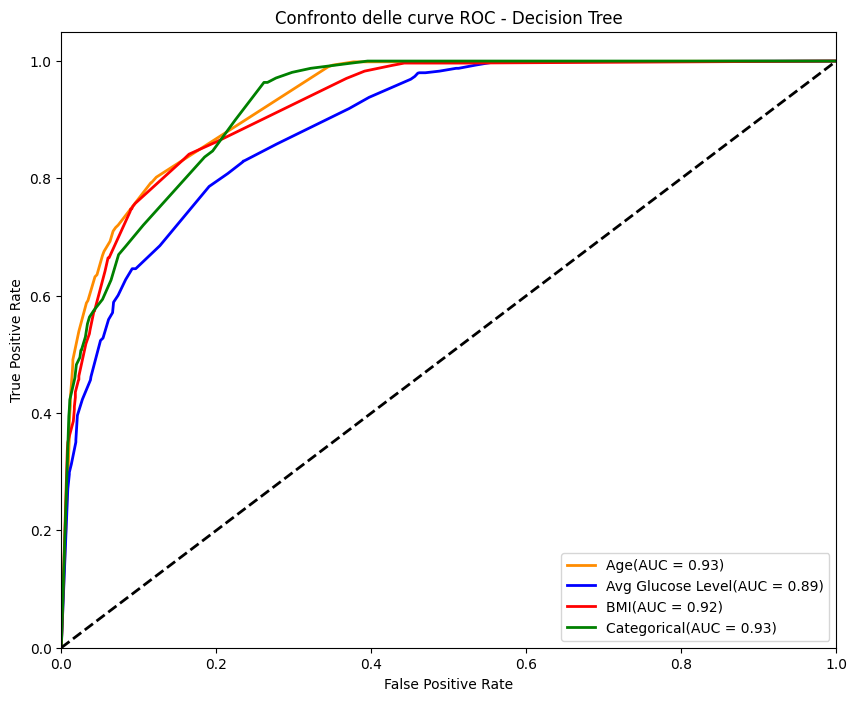

In [38]:
ML_algorithms.plot_roc_curve_conlusion_dt(y_pred_prob_age_dt, y_test_age_dt, y_pred_prob_glucose_dt, y_test_glucose_dt,
                                          y_pred_prob_bmi_dt, y_test_bmi_dt,  y_pred_prob_categorical_dt, y_test_categorical_dt)

### ROC Curve - Support Vector Machine

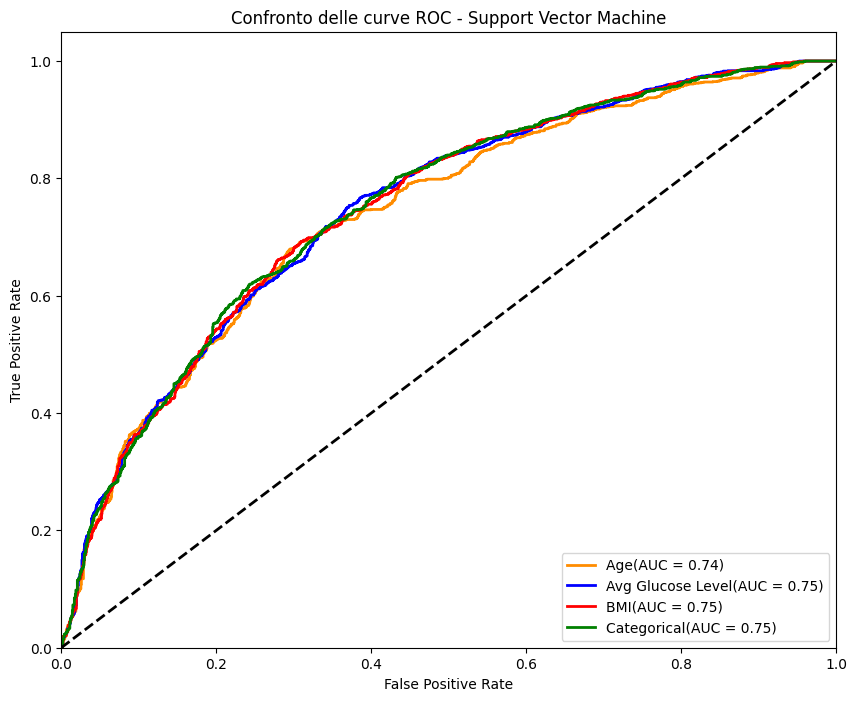

In [39]:
ML_algorithms.plot_roc_curve_conlusion_svm(y_pred_prob_age_svm, y_test_age_svm, y_pred_prob_glucose_svm, y_test_glucose_svm,
                                          y_pred_prob_bmi_svm, y_test_bmi_svm,  y_pred_prob_categorical_svm, y_test_categorical_svm)